<a href="https://colab.research.google.com/github/vishalverma1811/Reusability-of-the-car/blob/main/Reusability_of_the_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('reusability-of-the-car')
jovian.set_colab_id('1hqFBB3r9jaZ4BL-uPKkq4SNwyuX6CsxP')

# Reusability of the car

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet
!pip install numpy pandas-profiling matplotlib seaborn --quiet
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 192.9 MB 63 kB/s 
     |████████████████████████████████| 46 kB 1.7 MB/s 
     |████████████████████████████████| 2.0 MB 43.5 MB/s 


In [ ]:
import jovian

In [ ]:
import os
import opendatasets as od
import pandas as pd
import numpy as np

In [ ]:
od.download('https://www.kaggle.com/c/DontGetKicked/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishal1516841865651
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 89.6MB/s]


Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [ ]:
os.listdir('DontGetKicked')

['training.csv',
 'Carvana_Data_Dictionary.txt',
 'example_entry.csv',
 'test.zip',
 'test.csv',
 'training.zip']

In [ ]:
train = pd.read_csv("./DontGetKicked/training.csv")
train['IsBadBuy'] = train['IsBadBuy'].replace({0 : 'No', 1 : 'Yes'})
train_df = pd.DataFrame(train.iloc[:51088])
val_df = pd.DataFrame(train.iloc[51088:])
test_df = pd.read_csv("./DontGetKicked/test.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51088 entries, 0 to 51087
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              51088 non-null  int64  
 1   IsBadBuy                           51088 non-null  object 
 2   PurchDate                          51088 non-null  object 
 3   Auction                            51088 non-null  object 
 4   VehYear                            51088 non-null  int64  
 5   VehicleAge                         51088 non-null  int64  
 6   Make                               51088 non-null  object 
 7   Model                              51088 non-null  object 
 8   Trim                               49523 non-null  object 
 9   SubModel                           51086 non-null  object 
 10  Color                              51086 non-null  object 
 11  Transmission                       51085 non-null  obj

In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21895 entries, 51088 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              21895 non-null  int64  
 1   IsBadBuy                           21895 non-null  object 
 2   PurchDate                          21895 non-null  object 
 3   Auction                            21895 non-null  object 
 4   VehYear                            21895 non-null  int64  
 5   VehicleAge                         21895 non-null  int64  
 6   Make                               21895 non-null  object 
 7   Model                              21895 non-null  object 
 8   Trim                               21100 non-null  object 
 9   SubModel                           21889 non-null  object 
 10  Color                              21889 non-null  object 
 11  Transmission                       21889 non-null 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

In [ ]:
train_df['PurchDate'] = pd.to_datetime(train_df['PurchDate'])

train_df['PurchYear'] = train_df['PurchDate'].dt.year
train_df['PurchMonth'] = train_df['PurchDate'].dt.month
train_df['PurchDay'] = train_df['PurchDate'].dt.day
train_df.drop(["PurchDate"], axis=1, inplace=True)
train_df

,RefId,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
0,1,No,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7
1,2,No,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7
2,3,No,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,NaN,19638,33619,FL,4900.0,0,1389,2009,12,7
3,4,No,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,NaN,19638,33619,FL,4100.0,0,630,2009,12,7
4,5,No,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,NaN,19638,33619,FL,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,51111,No,OTHER,2004,6,CHEVROLET,MALIBU 4C,Cla,4D SEDAN CLASSIC,WHITE,...,NaN,835,85009,AZ,4185.0,0,1243,2010,1,27
51084,51112,Yes,OTHER,2005,5,CHEVROLET,COBALT,LS,4D SEDAN,SILVER,...,NaN,835,85009,AZ,4785.0,0,853,2010,1,27
51085,51113,No,OTHER,2005,5,DODGE,CARAVAN FWD V6,SXT,MINIVAN 3.3L SE,BLUE,...,NaN,835,85009,AZ,5695.0,0,1763,2010,1,27
51086,51114,No,OTHER,2006,4,CHEVROLET,COBALT,LT,4D SEDAN LT,WHITE,...,NaN,835,85009,AZ,5495.0,0,853,2010,2,3


In [ ]:
val_df['PurchDate'] = pd.to_datetime(val_df['PurchDate'])

val_df['PurchYear'] = val_df['PurchDate'].dt.year
val_df['PurchMonth'] = val_df['PurchDate'].dt.month
val_df['PurchDay'] = val_df['PurchDate'].dt.day
val_df.drop(["PurchDate"], axis=1, inplace=True)
val_df

,RefId,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
51088,51116,No,OTHER,2005,5,CHEVROLET,COBALT,LS,2D COUPE,RED,...,NaN,835,85009,AZ,5395.0,0,853,2010,2,3
51089,51117,No,OTHER,2004,6,CHRYSLER,SEBRING 4C,LX,4D SEDAN,SILVER,...,NaN,835,85009,AZ,5395.0,0,1020,2010,2,3
51090,51118,No,OTHER,2006,4,FORD,FREESTAR FWD V6,SE,PASSENGER 3.9L SE,BROWN,...,NaN,835,85009,AZ,4185.0,0,1774,2010,2,3
51091,51119,No,OTHER,2004,6,CHEVROLET,2500HD SILVERADO PIC,Bas,REG CAB 6.0L,GOLD,...,NaN,835,85009,AZ,6195.0,0,1341,2010,2,3
51092,51120,No,OTHER,2006,4,FORD,FIVE HUNDRED,SE,4D SEDAN SE,BLACK,...,NaN,835,85009,AZ,6995.0,0,1633,2010,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,Yes,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,...,NaN,18111,30212,GA,4200.0,0,993,2009,12,2
72979,73011,No,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,...,NaN,18881,30212,GA,6200.0,0,1038,2009,12,2
72980,73012,No,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,...,NaN,18111,30212,GA,8200.0,0,1893,2009,12,2
72981,73013,No,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,...,NaN,18881,30212,GA,7000.0,0,1974,2009,12,2


In [ ]:
test_df['PurchDate'] = pd.to_datetime(test_df['PurchDate'])

test_df['PurchYear'] = test_df['PurchDate'].dt.year
test_df['PurchMonth'] = test_df['PurchDate'].dt.month
test_df['PurchDay'] = test_df['PurchDate'].dt.day
test_df.drop(["PurchDate"], axis=1, inplace=True)
test_df

,RefId,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
0,73015,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,...,NaN,18881,30212,GA,6500.0,0,2152,2009,12,2
1,73016,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,...,NaN,18111,30212,GA,6300.0,0,1118,2009,12,2
2,73017,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,...,NaN,18111,30212,GA,9700.0,0,1215,2009,12,2
3,73018,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,...,NaN,18881,30212,GA,4150.0,0,1933,2009,12,2
4,73019,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,...,NaN,18111,30212,GA,4100.0,0,920,2009,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,...,NaN,20928,33411,FL,7955.0,0,1633,2010,11,17
48703,121743,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,...,NaN,20928,33411,FL,7035.0,0,594,2010,11,17
48704,121744,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,...,GREEN,20928,33411,FL,6335.0,0,594,2010,11,17
48705,121745,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,...,GREEN,20928,33411,FL,8055.0,0,1038,2010,11,17


In [ ]:
train_df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1565
SubModel                                 2
Color                                    2
Transmission                             3
WheelTypeID                           1876
WheelType                             1880
VehOdo                                   0
Nationality                              3
Size                                     3
TopThreeAmericanName                     3
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          217
MMRCurrentAuctionCleanPrice            217
MMRCurrentR

In [ ]:
val_df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                   795
SubModel                                 6
Color                                    6
Transmission                             6
WheelTypeID                           1293
WheelType                             1294
VehOdo                                   0
Nationality                              2
Size                                     2
TopThreeAmericanName                     2
MMRAcquisitionAuctionAveragePrice        5
MMRAcquisitionAuctionCleanPrice          5
MMRAcquisitionRetailAveragePrice         5
MMRAcquisitonRetailCleanPrice            5
MMRCurrentAuctionAveragePrice           98
MMRCurrentAuctionCleanPrice             98
MMRCurrentR

In [ ]:
test_df.isnull().sum()

RefId                                    0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentRetailAveragePrice           143
MMRCurrentR

In [ ]:
train_copy = train_df.copy()
train_copy = train_copy.drop(columns = "IsBadBuy")
input_col = list(train_copy.columns)
input_col

['RefId',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'PurchYear',
 'PurchMonth',
 'PurchDay']

In [ ]:
target_col = 'IsBadBuy'
target_col

'IsBadBuy'

In [ ]:
train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_col].copy()

In [ ]:
numeric_cols = ['RefId',
 'VehYear',
 'VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNZIP1',
 'VehBCost',
 'WarrantyCost',
 'PurchYear',
 'PurchMonth',
 'PurchDay']
numeric_cols

['RefId',
 'VehYear',
 'VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNZIP1',
 'VehBCost',
 'WarrantyCost',
 'PurchYear',
 'PurchMonth',
 'PurchDay']

In [ ]:
categorical_cols = ['Auction',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
'WheelTypeID',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'PRIMEUNIT',
 'AUCGUART',
 'VNST','IsOnlineSale']
categorical_cols

['Auction',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'PRIMEUNIT',
 'AUCGUART',
 'VNST',
 'IsOnlineSale']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean').fit(train_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

RefId                                0
VehYear                              0
VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
WarrantyCost                         0
PurchYear                            0
PurchMonth                           0
PurchDay                             0
dtype: int64

In [ ]:
val_inputs[numeric_cols].isna().sum()

RefId                                0
VehYear                              0
VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
WarrantyCost                         0
PurchYear                            0
PurchMonth                           0
PurchDay                             0
dtype: int64

In [ ]:
test_inputs[numeric_cols].isna().sum()

RefId                                0
VehYear                              0
VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
WarrantyCost                         0
PurchYear                            0
PurchMonth                           0
PurchDay                             0
dtype: int64

In [ ]:
train_inputs.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
count,51088.000000,51088.000000,51088.000000,49212.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,...,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.00000,51088.000000
mean,25559.816982,2005.289598,4.237845,1.485552,72033.973497,6108.602878,7365.105512,8496.219990,9863.363603,6111.994633,...,8760.169409,10141.917635,24978.105348,55864.864215,6729.170919,0.027658,1291.492210,2009.527345,6.62318,15.608695
std,14755.305870,1.715046,1.696159,0.520626,14277.914479,2465.676181,2733.583511,3161.359634,3397.348304,2438.078742,...,3090.136675,3319.522749,24382.331175,26020.352076,1766.078034,0.163993,600.345923,0.499257,3.41338,8.489555
min,1.000000,2001.000000,1.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000,2009.000000,1.00000,1.000000
25%,12780.750000,2004.000000,3.000000,1.000000,62733.000000,4262.000000,5393.000000,6268.000000,7490.750000,4264.000000,...,6522.000000,7770.000000,17212.000000,30272.000000,5430.000000,0.000000,853.000000,2009.000000,4.00000,9.000000
50%,25561.500000,2005.000000,4.000000,1.000000,73783.000000,6063.000000,7282.000000,8443.000000,9810.000000,6042.000000,...,8729.500000,10103.000000,19638.000000,55369.000000,6700.000000,0.000000,1215.000000,2010.000000,7.00000,16.000000
75%,38338.250000,2006.000000,5.000000,2.000000,82697.250000,7739.250000,9038.000000,10657.000000,12122.000000,7705.000000,...,10847.000000,12316.000000,21973.000000,80011.000000,7900.000000,0.000000,1623.000000,2010.000000,10.00000,23.000000
max,51115.000000,2009.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,...,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000,2010.000000,12.00000,31.000000


In [ ]:
val_inputs.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
count,21895.000000,21895.000000,21895.000000,20602.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,...,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000
mean,62065.021968,2005.467778,4.033843,1.515193,70254.056360,6176.273670,7393.533434,8498.933779,9821.922805,6178.660857,...,8811.791806,10153.426624,29537.207216,63125.483489,6735.048915,0.019731,1241.788354,2009.501530,6.572642,15.804522
std,6322.294890,1.762233,1.740783,0.522293,15185.653202,2451.763498,2695.261501,3143.181989,3357.159484,2408.129875,...,3069.486919,3264.530064,28335.981504,25749.154522,1771.999376,0.139076,593.893604,0.500009,3.421103,8.505140
min,51116.000000,2001.000000,0.000000,0.000000,8706.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,835.000000,3106.000000,1915.000000,0.000000,462.000000,2009.000000,1.000000,1.000000
25%,56589.500000,2004.000000,3.000000,1.000000,59550.000000,4311.000000,5439.500000,6296.500000,7497.000000,4338.500000,...,6596.000000,7860.000000,17675.000000,33073.000000,5435.000000,0.000000,825.000000,2009.000000,4.000000,9.000000
50%,62065.000000,2006.000000,4.000000,2.000000,72288.000000,6177.000000,7377.000000,8451.000000,9750.000000,6129.000000,...,8760.169409,10140.000000,20207.000000,77086.000000,6730.000000,0.000000,1118.000000,2010.000000,7.000000,16.000000
75%,67540.500000,2007.000000,5.000000,2.000000,81764.000000,7811.000000,8979.500000,10645.000000,11999.000000,7767.000000,...,10995.000000,12285.500000,22916.000000,85009.000000,7870.000000,0.000000,1508.000000,2010.000000,10.000000,23.000000
max,73014.000000,2010.000000,9.000000,3.000000,114184.000000,32250.000000,35215.000000,35330.000000,38532.000000,32250.000000,...,35330.000000,38532.000000,99761.000000,98064.000000,38785.000000,1.000000,7198.000000,2010.000000,12.000000,31.000000


In [ ]:
test_inputs.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
count,48707.000000,48707.000000,48707.000000,46519.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,...,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000
mean,97378.396144,2005.331533,4.215801,1.462198,71576.351448,6134.878601,7393.480486,8550.132798,9920.573914,6112.366153,...,8811.977462,10195.643136,25432.898906,54198.092636,6760.866483,0.022009,1281.105755,2009.547272,6.801918,15.514197
std,14067.338432,1.730500,1.704778,0.516574,14487.934950,2453.666869,2715.237102,3130.594668,3360.756571,2423.759471,...,3057.682533,3280.205904,24137.133174,26053.831141,1757.034461,0.146715,612.003001,0.497765,3.363376,8.577258
min,73015.000000,2001.000000,0.000000,1.000000,223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,835.000000,3106.000000,1625.000000,0.000000,462.000000,2009.000000,1.000000,1.000000
25%,85195.500000,2004.000000,3.000000,1.000000,62226.500000,4284.000000,5432.000000,6378.000000,7579.500000,4252.000000,...,6629.000000,7883.000000,17212.000000,32750.000000,5480.000000,0.000000,853.000000,2009.000000,4.000000,8.000000
50%,97378.000000,2005.000000,4.000000,1.000000,73412.000000,6115.000000,7309.000000,8496.219990,9880.000000,6062.000000,...,8756.000000,10141.917635,19638.000000,40509.000000,6730.000000,0.000000,1209.000000,2010.000000,7.000000,16.000000
75%,109560.500000,2007.000000,5.000000,2.000000,82419.500000,7755.000000,9044.000000,10665.000000,12183.000000,7667.000000,...,10866.000000,12365.500000,21973.000000,78219.000000,7935.000000,0.000000,1623.000000,2010.000000,10.000000,23.000000
max,121746.000000,2010.000000,9.000000,3.000000,114786.000000,27584.000000,30843.000000,32456.000000,35754.000000,27009.000000,...,31677.000000,36036.000000,99791.000000,98064.000000,56950.000000,1.000000,7498.000000,2010.000000,12.000000,31.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
count,51088.000000,51088.000000,51088.000000,49212.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,...,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000
mean,0.500036,0.536200,0.404731,1.485552,0.606076,0.171004,0.199818,0.217406,0.237775,0.171099,...,0.224160,0.246990,0.244052,0.550496,0.147976,0.027658,0.117893,0.527345,0.511198,0.486956
std,0.288674,0.214381,0.212020,0.520626,0.128755,0.069024,0.074163,0.080895,0.081899,0.068251,...,0.079072,0.080842,0.246470,0.269753,0.038842,0.163993,0.085325,0.499257,0.310307,0.282985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250024,0.375000,0.250000,1.000000,0.522202,0.119310,0.146314,0.160389,0.180578,0.119366,...,0.166888,0.189226,0.165548,0.285175,0.119403,0.000000,0.055571,0.000000,0.272727,0.266667
50%,0.500068,0.500000,0.375000,1.000000,0.621848,0.169727,0.197564,0.216044,0.236488,0.169139,...,0.223375,0.246043,0.190071,0.545356,0.147334,0.000000,0.107021,1.000000,0.545455,0.500000
75%,0.750034,0.625000,0.500000,2.000000,0.702235,0.216652,0.245205,0.272697,0.292223,0.215693,...,0.277559,0.299937,0.213675,0.800819,0.173727,0.000000,0.165009,1.000000,0.818182,0.733333
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
val_inputs.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
count,21895.000000,21895.000000,21895.000000,20602.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,...,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000,21895.000000
mean,1.214227,0.558472,0.379230,1.515193,0.590025,0.172898,0.200590,0.217475,0.236776,0.172965,...,0.225481,0.247271,0.290138,0.625767,0.148105,0.019731,0.110828,0.501530,0.506604,0.493484
std,0.123690,0.220279,0.217598,0.522293,0.136941,0.068635,0.073124,0.080429,0.080931,0.067413,...,0.078544,0.079502,0.286436,0.266941,0.038972,0.139076,0.084408,0.500009,0.311009,0.283505
min,1.000020,0.000000,-0.125000,0.000000,0.034998,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003546,0.042096,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.107104,0.375000,0.250000,1.000000,0.493498,0.120682,0.147576,0.161118,0.180729,0.121452,...,0.168782,0.191418,0.170228,0.314213,0.119513,0.000000,0.051592,0.000000,0.272727,0.266667
50%,1.214227,0.625000,0.375000,2.000000,0.608367,0.172919,0.200141,0.216249,0.235042,0.171575,...,0.224160,0.246944,0.195823,0.770496,0.147994,0.000000,0.093235,1.000000,0.545455,0.500000
75%,1.321350,0.750000,0.500000,2.000000,0.693819,0.218661,0.243618,0.272390,0.289258,0.217429,...,0.281346,0.299194,0.223207,0.852633,0.173067,0.000000,0.148664,1.000000,0.818182,0.733333
max,1.428434,1.125000,1.000000,3.000000,0.986176,0.902805,0.955398,0.904043,0.928885,0.902805,...,0.904043,0.938386,1.000000,0.987974,0.852996,1.000000,0.957362,1.000000,1.000000,1.000000


In [ ]:
test_inputs.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,PurchDay
count,48707.000000,48707.000000,48707.000000,46519.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,...,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000
mean,1.905102,0.541442,0.401975,1.462198,0.601949,0.171740,0.200588,0.218785,0.239154,0.171109,...,0.225486,0.248299,0.248649,0.533217,0.148673,0.022009,0.116416,0.547272,0.527447,0.483807
std,0.275215,0.216312,0.213097,0.516574,0.130649,0.068688,0.073666,0.080107,0.081017,0.067851,...,0.078242,0.079884,0.243992,0.270100,0.038643,0.146715,0.086982,0.497765,0.305761,0.285909
min,1.428454,0.000000,-0.125000,1.000000,-0.041500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003546,0.035717,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.666755,0.375000,0.250000,1.000000,0.517634,0.119926,0.147372,0.163204,0.182718,0.119030,...,0.169626,0.191978,0.165548,0.310865,0.120502,0.000000,0.055571,0.000000,0.272727,0.233333
50%,1.905094,0.500000,0.375000,1.000000,0.618503,0.171183,0.198296,0.217406,0.238176,0.169699,...,0.224053,0.246990,0.190071,0.391302,0.147994,0.000000,0.106168,1.000000,0.545455,0.500000
75%,2.143434,0.750000,0.500000,2.000000,0.699730,0.217093,0.245367,0.272902,0.293694,0.214630,...,0.278045,0.301142,0.213675,0.782241,0.174496,0.000000,0.165009,1.000000,0.818182,0.733333
max,2.381833,1.125000,1.000000,3.000000,0.991604,0.772185,0.836783,0.830502,0.861916,0.756089,...,0.810568,0.877600,1.000303,0.987974,1.252507,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
train_inputs

,RefId,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
0,0.000000,ADESA,0.625,0.250,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000020,ADESA,0.375,0.500,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000039,ADESA,0.500,0.375,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000059,ADESA,0.375,0.500,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000078,ADESA,0.500,0.375,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,0.999922,OTHER,0.375,0.625,CHEVROLET,MALIBU 4C,Cla,4D SEDAN CLASSIC,WHITE,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51084,0.999941,OTHER,0.500,0.500,CHEVROLET,COBALT,LS,4D SEDAN,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51085,0.999961,OTHER,0.500,0.500,DODGE,CARAVAN FWD V6,SXT,MINIVAN 3.3L SE,BLUE,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51086,0.999980,OTHER,0.625,0.375,CHEVROLET,COBALT,LT,4D SEDAN LT,WHITE,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
val_inputs

,RefId,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
51088,1.000020,OTHER,0.500,0.500,CHEVROLET,COBALT,LS,2D COUPE,RED,MANUAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51089,1.000039,OTHER,0.375,0.625,CHRYSLER,SEBRING 4C,LX,4D SEDAN,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51090,1.000059,OTHER,0.625,0.375,FORD,FREESTAR FWD V6,SE,PASSENGER 3.9L SE,BROWN,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51091,1.000078,OTHER,0.375,0.625,CHEVROLET,2500HD SILVERADO PIC,Bas,REG CAB 6.0L,GOLD,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51092,1.000098,OTHER,0.625,0.375,FORD,FIVE HUNDRED,SE,4D SEDAN SE,BLACK,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1.428356,ADESA,0.000,0.875,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72979,1.428376,ADESA,0.750,0.125,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72980,1.428395,ADESA,0.500,0.375,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72981,1.428415,ADESA,0.625,0.250,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
test_inputs

,RefId,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
0,1.428454,ADESA,0.500,0.375,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.428474,ADESA,0.500,0.375,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.428493,ADESA,0.625,0.250,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.428513,ADESA,0.125,0.750,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.428532,ADESA,0.750,0.125,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2.381755,MANHEIM,0.500,0.500,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48703,2.381774,MANHEIM,0.750,0.250,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48704,2.381794,MANHEIM,0.625,0.375,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48705,2.381813,MANHEIM,0.500,0.500,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train

,RefId,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
0,0.000000,0.625,0.250,0.759487,0.228291,0.266665,0.297748,0.327853,0.208583,0.232019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000020,0.375,0.500,0.800491,0.191871,0.227434,0.278838,0.303071,0.208723,0.250197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000039,0.500,0.375,0.622065,0.089637,0.129141,0.177661,0.203872,0.112956,0.150764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000059,0.375,0.500,0.548209,0.052993,0.072574,0.119191,0.137168,0.051621,0.071787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000078,0.500,0.375,0.582026,0.109540,0.137117,0.197620,0.209898,0.090896,0.118940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,0.999922,0.375,0.625,0.710782,0.072812,0.094767,0.151279,0.170532,0.096495,0.122575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51084,0.999941,0.500,0.500,0.734102,0.116427,0.142408,0.184135,0.197773,0.116455,0.142950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51085,0.999961,0.500,0.500,0.749215,0.098791,0.125125,0.176842,0.199894,0.166984,0.190781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51086,0.999980,0.625,0.375,0.691411,0.146044,0.174530,0.228813,0.241575,0.148872,0.176890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_val

,RefId,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
51088,1.000020,0.500,0.500,0.723885,0.112424,0.134892,0.176970,0.190637,0.144477,0.166499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51089,1.000039,0.375,0.625,0.542952,0.093248,0.118831,0.160977,0.180199,0.087565,0.119401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51090,1.000059,0.625,0.375,0.840277,0.154163,0.181801,0.241607,0.263030,0.173507,0.205377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51091,1.000078,0.375,0.625,0.796460,0.111416,0.152446,0.232779,0.258305,0.120682,0.155267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51092,1.000098,0.625,0.375,0.754825,0.167768,0.194037,0.257395,0.273564,0.188287,0.216365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1.428356,0.000,0.875,0.364400,0.055876,0.081201,0.067963,0.089967,0.061307,0.082883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72979,1.428376,0.750,0.125,0.603596,0.179665,0.198730,0.190148,0.202763,0.189939,0.220625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72980,1.428395,0.500,0.375,0.754563,0.239208,0.270192,0.248951,0.271347,0.234449,0.265932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72981,1.428415,0.625,0.250,0.673890,0.179721,0.206300,0.190225,0.210019,0.184480,0.208470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test

,RefId,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
0,1.428454,0.500,0.375,0.726400,0.140866,0.173255,0.151868,0.178318,0.137310,0.167693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.428474,0.500,0.375,0.514446,0.126029,0.154236,0.137206,0.160069,0.130032,0.154915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.428493,0.625,0.250,0.581268,0.286770,0.353808,0.295906,0.351574,0.304658,0.330069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.428513,0.125,0.750,0.749053,0.071609,0.096096,0.083495,0.104262,0.081966,0.097859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.428532,0.750,0.125,0.618683,0.140334,0.172088,0.151331,0.177185,0.140334,0.172088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2.381755,0.500,0.500,0.755871,0.149992,0.185464,0.229964,0.262885,0.161273,0.188963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48703,2.381774,0.750,0.250,0.694703,0.191731,0.216826,0.281448,0.289788,0.191927,0.222008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48704,2.381794,0.625,0.375,0.700014,0.130508,0.153423,0.203992,0.233113,0.135295,0.158876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48705,2.381813,0.500,0.500,0.639676,0.166648,0.221547,0.233802,0.288053,0.142545,0.185925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Logistic regression model**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 

In [ ]:
model = LogisticRegression(solver = 'liblinear')

In [ ]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
log_importance_df = pd.DataFrame({
  'feature': X_train.columns,
  'coefficient': model.coef_[0]
}).sort_values('coefficient', ascending=False)

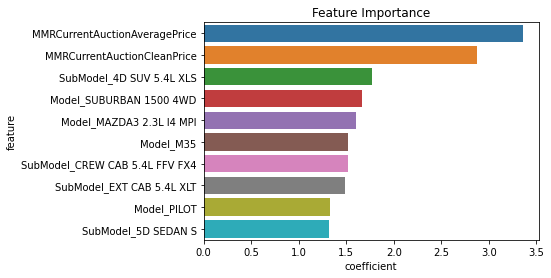

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=log_importance_df.head(10), x='coefficient', y='feature');

In [ ]:
log_pred = model.predict(X_train)

In [ ]:
log_prob = model.predict_proba(X_train)
log_prob

array([[0.9517122 , 0.0482878 ],
       [0.91471076, 0.08528924],
       [0.96257493, 0.03742507],
       ...,
       [0.94294937, 0.05705063],
       [0.84263434, 0.15736566],
       [0.94478016, 0.05521984]])

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, log_pred)

0.8937911055433762

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, log_pred)

array([[44566,   409],
       [ 5017,  1096]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 89.38%


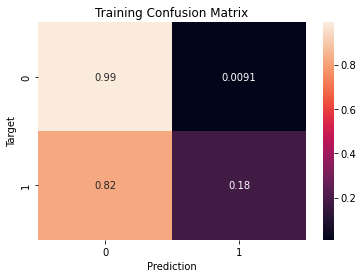

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 90.63%


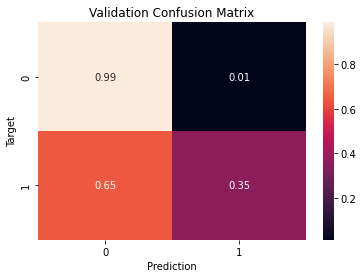

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [ ]:
log_test = model.predict(X_test)
log_test_pred = pd.DataFrame(log_test, columns = ['Is_Bad_Buy']) 
log_test_pred

,Is_Bad_Buy
0,No
1,No
2,No
3,No
4,No
...,...
48702,No
48703,No
48704,No
48705,No


In [ ]:
reg_test_prob = model.predict_proba(X_test)
reg_test_prob

array([[0.92248435, 0.07751565],
       [0.95600587, 0.04399413],
       [0.96958348, 0.03041652],
       ...,
       [0.97631272, 0.02368728],
       [0.94101973, 0.05898027],
       [0.93433603, 0.06566397]])

# **Decision tree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 52)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=52)

In [ ]:
model.tree_.max_depth

105

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
2027,WheelTypeID_nan,0.087891
3,VehOdo,0.057439
0,RefId,0.057059
14,VehBCost,0.052731
12,BYRNO,0.035504
18,PurchDay,0.034326
10,MMRCurrentRetailAveragePrice,0.031704
8,MMRCurrentAuctionAveragePrice,0.031608
13,VNZIP1,0.030625
6,MMRAcquisitionRetailAveragePrice,0.030000


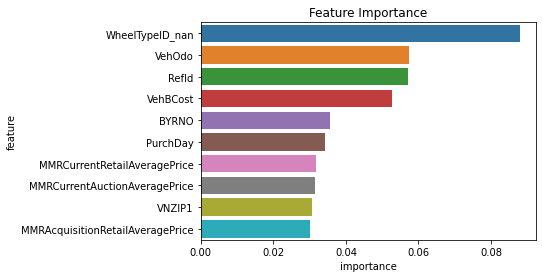

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

### Hyperparameter Tuning and Overfitting

max_depth and max_leaf_nodes

In [ ]:
model = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 256, random_state = 52)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=256, random_state=52)

In [ ]:
model.score(X_train, train_targets)

0.8970991230817413

In [ ]:
model.score(X_val, val_targets)

0.8920758163964375

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.9166666666666666, 'WheelTypeID_nan <= 0.5\ngini = 0.211\nsamples = 51088\nvalue = [44975, 6113]\nclass = No'),
 Text(0.23557692307692307, 0.75, 'VehicleAge <= 0.438\ngini = 0.181\nsamples = 49212\nvalue = [44248, 4964]\nclass = No'),
 Text(0.125, 0.5833333333333334, 'VehBCost <= 0.27\ngini = 0.125\nsamples = 29672\nvalue = [27683, 1989]\nclass = No'),
 Text(0.07692307692307693, 0.4166666666666667, 'VehBCost <= 0.138\ngini = 0.124\nsamples = 29653\nvalue = [27680, 1973]\nclass = No'),
 Text(0.038461538461538464, 0.25, 'VehOdo <= 0.485\ngini = 0.166\nsamples = 9505\nvalue = [8639, 866]\nclass = No'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.104\nsamples = 2454\nvalue = [2319, 135]\nclass = No'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.186\nsamples = 7051\nvalue = [6320, 731]\nclass = No'),
 Text(0.11538461538461539, 0.25, 'VehicleAge <= 0.188\ngini = 0.104\nsamples = 20148\nvalue = [19041, 1107]\nclass = No'),
 Text(0.09615384615384616, 0

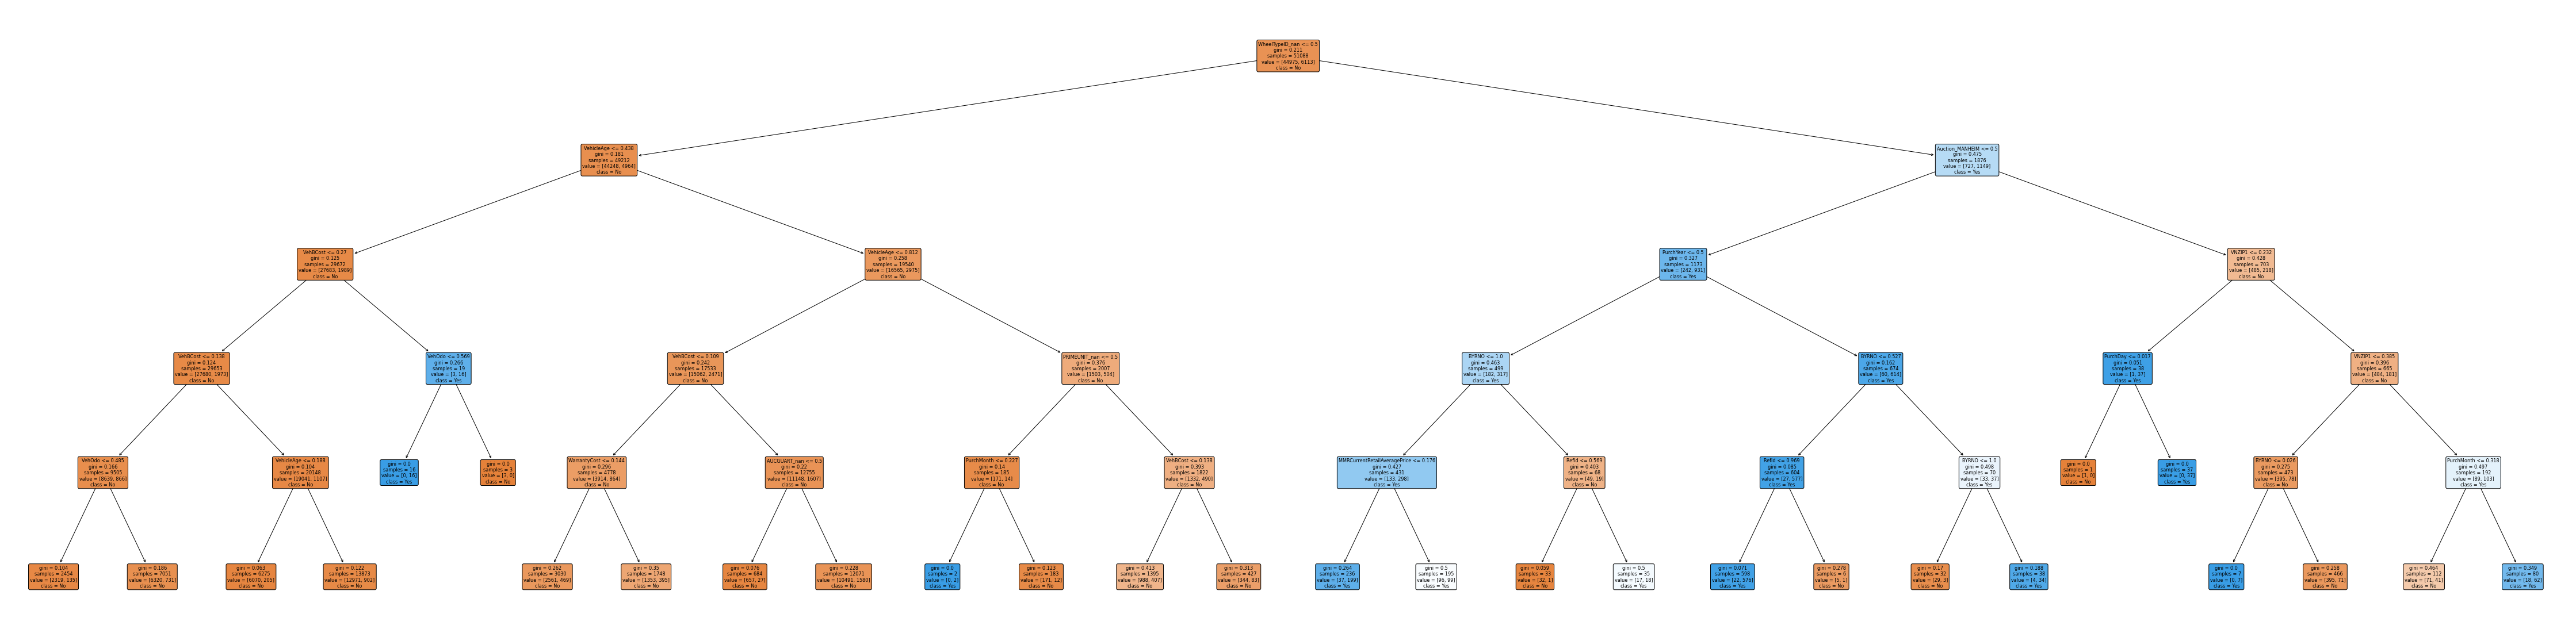

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- WheelTypeID_nan <= 0.50
|   |--- VehicleAge <= 0.44
|   |   |--- VehBCost <= 0.27
|   |   |   |--- VehBCost <= 0.14
|   |   |   |   |--- VehOdo <= 0.48
|   |   |   |   |   |--- class: No
|   |   |   |   |--- VehOdo >  0.48
|   |   |   |   |   |--- class: No
|   |   |   |--- VehBCost >  0.14
|   |   |   |   |--- VehicleAge <= 0.19
|   |   |   |   |   |--- class: No
|   |   |   |   |--- VehicleAge >  0.19
|   |   |   |   |   |--- class: No
|   |   |--- VehBCost >  0.27
|   |   |   |--- VehOdo <= 0.57
|   |   |   |   |--- class: Yes
|   |   |   |--- VehOdo >  0.57
|   |   |   |   |--- class: No
|   |--- VehicleAge >  0.44
|   |   |--- VehicleAge <= 0.81
|   |   |   |--- VehBCost <= 0.11
|   |   |   |   |--- WarrantyCost <= 0.14
|   |   |   |   |   |--- class: No
|   |   |   |   |--- WarrantyCost >  0.14
|   |   |   |   |   |--- class: No
|   |   |   |--- VehBCost >  0.11
|   |   |   |   |--- AUCGUART_nan <= 0.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- AUCGUART_nan >  

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md,max_leaf_nodes=256, random_state=52)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 25)])

In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.111396,0.090523
1,2,0.106170,0.090158
2,3,0.105211,0.089838
3,4,0.104271,0.090340
4,5,0.102901,0.107924
5,6,0.101570,0.107787
6,7,0.100337,0.106600
7,8,0.098692,0.107559
8,9,0.096872,0.109797
9,10,0.094641,0.111030


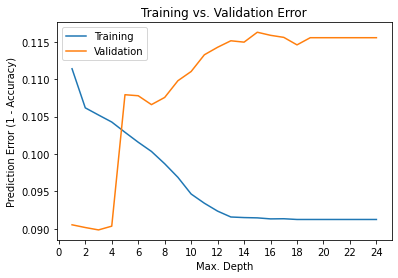

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,26, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 52).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.9096597396665905

In [ ]:
result2 = pd.DataFrame(model.predict(X_test))
result2

,0
0,No
1,No
2,No
3,No
4,Yes
...,...
48702,No
48703,No
48704,No
48705,No


In [ ]:
dec_test_prob = model.predict_proba(X_test)
dec_test_prob

array([[0.94505658, 0.05494342],
       [0.94505658, 0.05494342],
       [0.94505658, 0.05494342],
       ...,
       [0.94505658, 0.05494342],
       [0.87401019, 0.12598981],
       [0.87401019, 0.12598981]])

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 1min 16s, sys: 334 ms, total: 1min 16s
Wall time: 39.3 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.9999217037269026

In [ ]:
model.score(X_val, val_targets)

0.9060972824845855

We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.96, 0.04],
       [0.97, 0.03],
       [0.94, 0.06],
       ...,
       [0.96, 0.04],
       [0.87, 0.13],
       [0.97, 0.03]])

We can can access individual decision trees using `model.estimators_`

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_depth=30, max_features=7, random_state=1608637542)

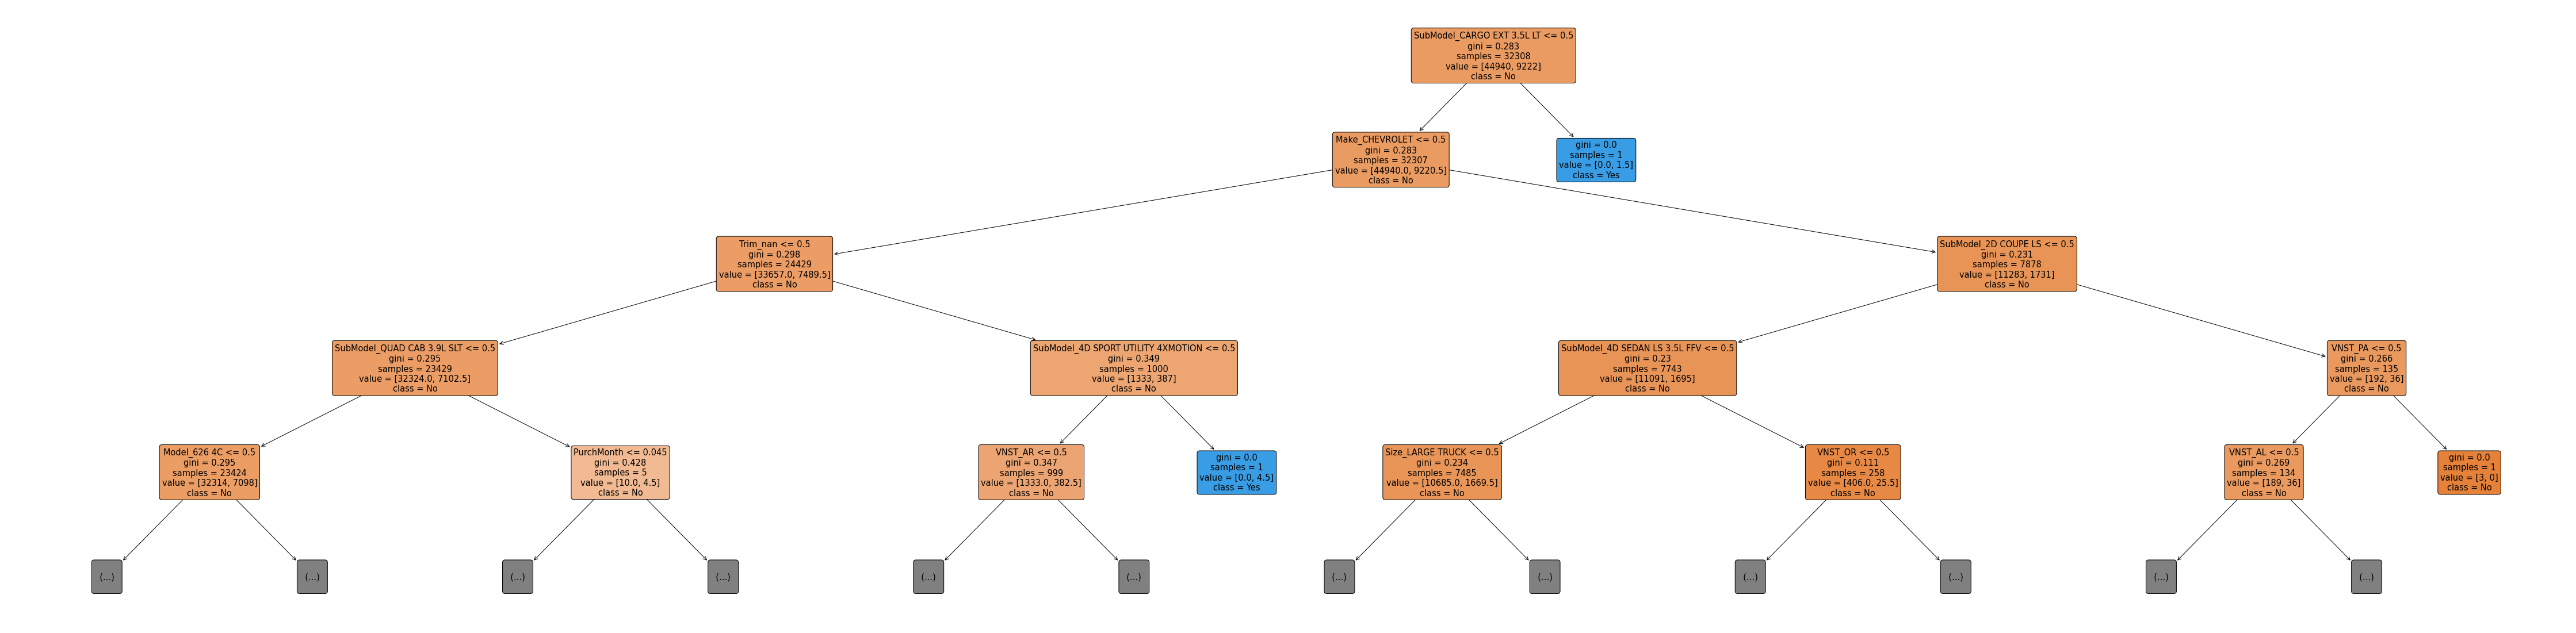

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=4, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

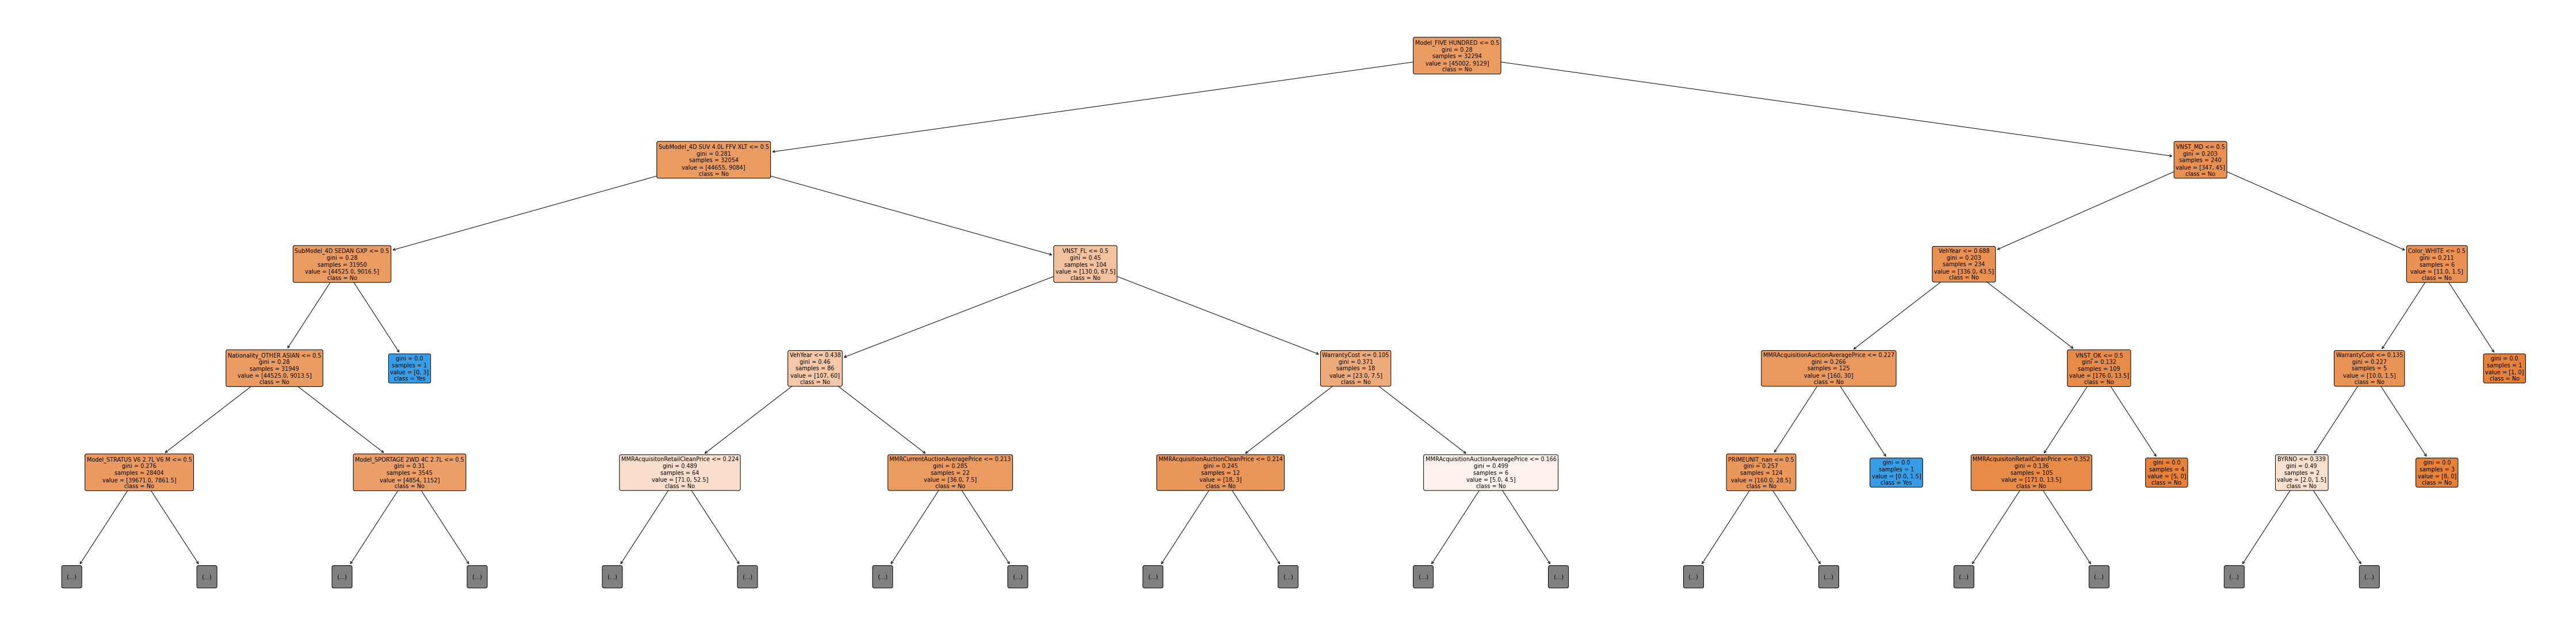

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=4, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
len(model.estimators_)

500

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
3,VehOdo,0.038114
14,VehBCost,0.037048
0,RefId,0.036515
9,MMRCurrentAuctionCleanPrice,0.035503
11,MMRCurrentRetailCleanPrice,0.034605
10,MMRCurrentRetailAveragePrice,0.034551
4,MMRAcquisitionAuctionAveragePrice,0.034528
5,MMRAcquisitionAuctionCleanPrice,0.034439
6,MMRAcquisitionRetailAveragePrice,0.033960
8,MMRCurrentAuctionAveragePrice,0.033861


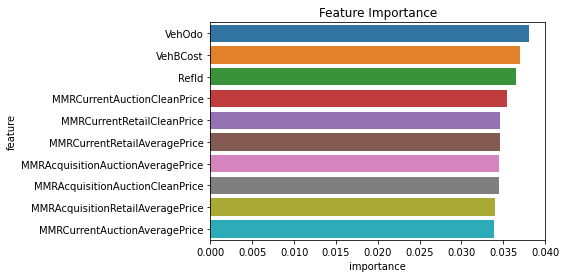

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning with Random Forests

In [ ]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [ ]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.8804415909802693

In [ ]:
model.score(X_val, val_targets)

0.8692395524092259

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
result3 = pd.DataFrame(model.predict(X_test))
result3

,0
0,No
1,No
2,No
3,No
4,No
...,...
48702,No
48703,No
48704,No
48705,No


In [ ]:
ram_test_prob = model.predict_proba(X_test)
ram_test_prob

array([[0.840941  , 0.159059  ],
       [0.84555507, 0.15444493],
       [0.85851999, 0.14148001],
       ...,
       [0.89631753, 0.10368247],
       [0.88051719, 0.11948281],
       [0.8543454 , 0.1456546 ]])

# Saving

In [ ]:
# Execute this to save new versions of the notebook+
jovian.commit(project="used-car-quality-detection")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/vishalverma1523/used-car-quality-detection


'https://jovian.ai/vishalverma1523/used-car-quality-detection'